In [ ]:
# IMPORT BIBLIOTEK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT MODELI ML 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# WCZYTANIE DANYCH
df = pd.read_csv("archive\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# CZYSZCZENIE I EKSPLORACJA DANYCH
# Rozmiar danych
df.shape

# Informacje o typach danych i brakach
df.info()

# Sprawdzenie braków
df.isnull().sum()

# Usunięcie niepotrzebnych kolumn
df = df.drop(columns=["id", "name", "host_id", "host_name", "last_review"])

# Wypełnienie braków w reviews_per_month zerem
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

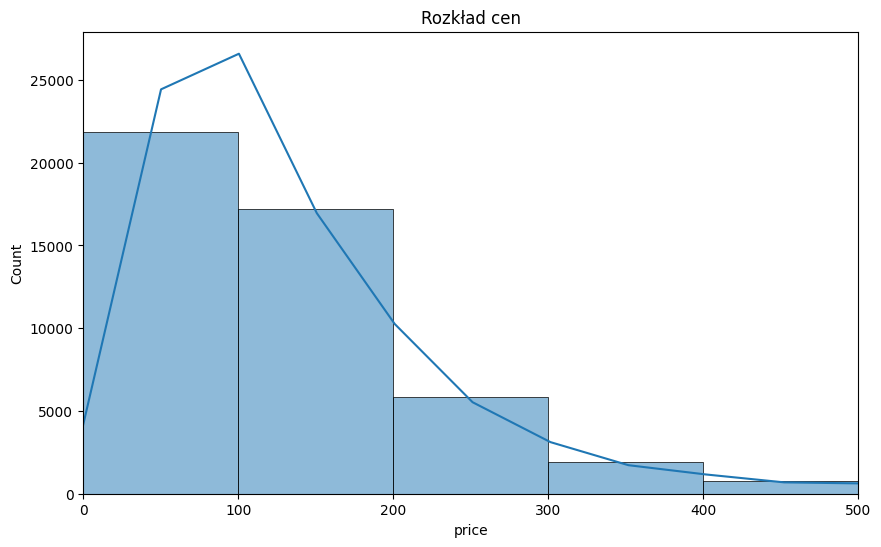

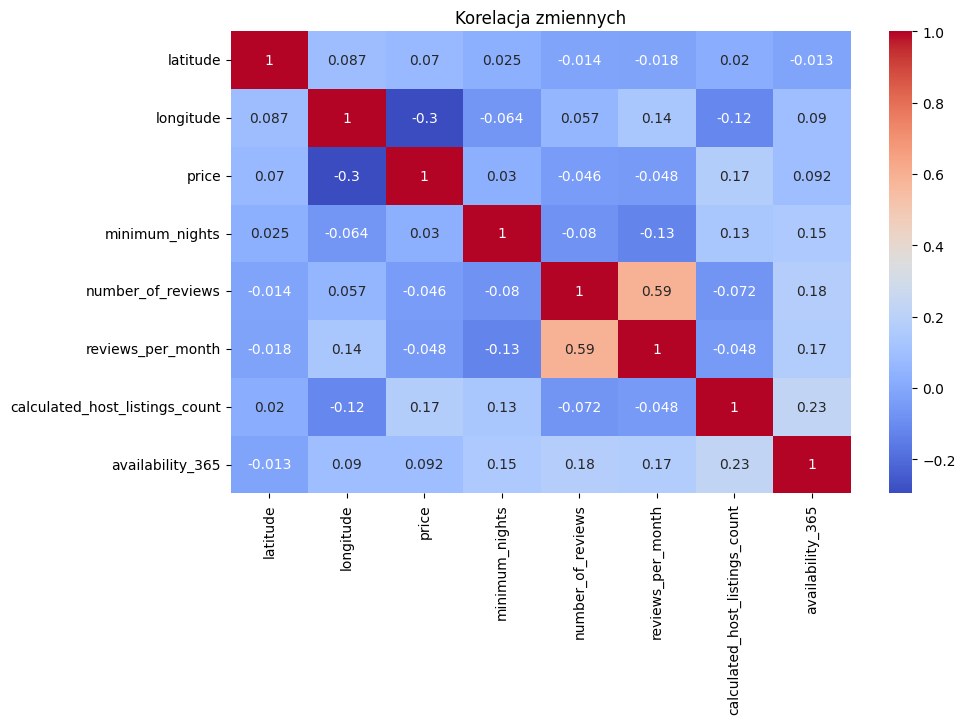

In [ ]:
# EDA EXPLORACYJNA ANALIZA DANYCH
# Rozkład cen
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=100, kde=True)
plt.xlim(0, 500)
plt.title("Rozkład cen")
plt.show()

# Filtracja ekstremalnych wartości
df = df[df["price"] < 500]

# Korelacje między zmiennymi numerycznymi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelacja zmiennych")
plt.show()


In [ ]:
# PRZYGOTOWANIE DO TRENINGU/ MODELU
# Definiujemy zmienne niezależne (X) i zależną (y)
X = df.drop(columns=["price"])
y = df["price"]

# Kategoryczne i numeryczne zmienne
cat_features = ["neighbourhood_group", "neighbourhood", "room_type"]
num_features = ["latitude", "longitude", "minimum_nights", "number_of_reviews", 
                "reviews_per_month", "calculated_host_listings_count", "availability_365"]

# Pipeline do przetwarzania danych
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

In [ ]:
# TRENOWANIE MODELI

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline z RandomForest
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Pipeline z regresją liniową
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [ ]:
# OCENA MODELI
def print_metrics(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_lr, "Linear Regression")

Sprawdzam brakujące wartości:
neighbourhood_group_encoded    0
room_type_encoded              0
minimum_nights                 0
number_of_reviews              0
reviews_per_month              0
dtype: int64
0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram z ustalonymi przedziałami (bins)
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=50, kde=False, color='skyblue', edgecolor='black')

plt.title("Rozkład cen noclegów")
plt.xlabel("Cena (USD)")
plt.ylabel("Liczba ogłoszeń")
plt.xlim(0, 500)  # Obcięcie outlierów
plt.grid(True)
plt.tight_layout()
plt.show()


RMSE: 99.20 USD
R²: 0.2967
MAPE: 45.38%

Najważniejsze cechy:
room_type_encoded              0.453814
reviews_per_month              0.213619
number_of_reviews              0.126387
neighbourhood_group_encoded    0.105608
minimum_nights                 0.100572
dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label="Random Forest", color='blue')
plt.scatter(y_test, y_pred_lr, alpha=0.3, label="Linear Regression", color='orange')

plt.plot([0, 500], [0, 500], '--k')  # linia 
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.xlabel("Cena rzeczywista")
plt.ylabel("Cena przewidywana")
plt.title("Porównanie przewidywanych i rzeczywistych cen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()